Convergence at 2044
Cost: 0.2253523757231244
Theta: [ 0.44858927  2.51364886 -2.72975375]


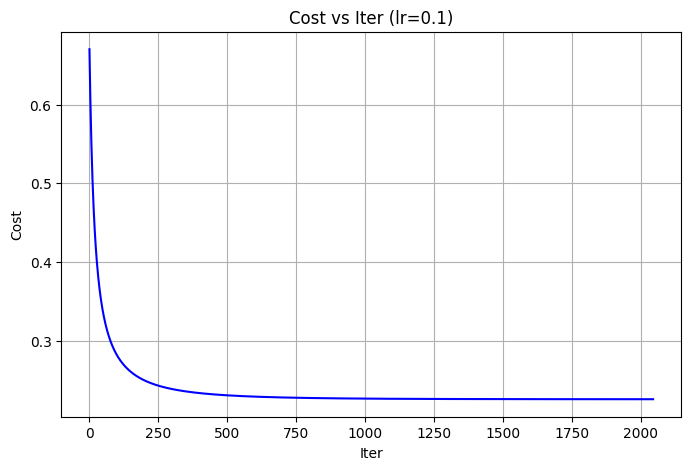

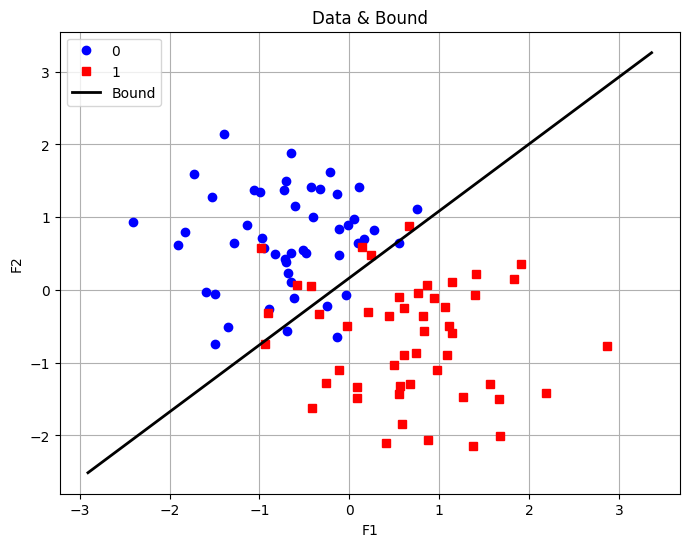

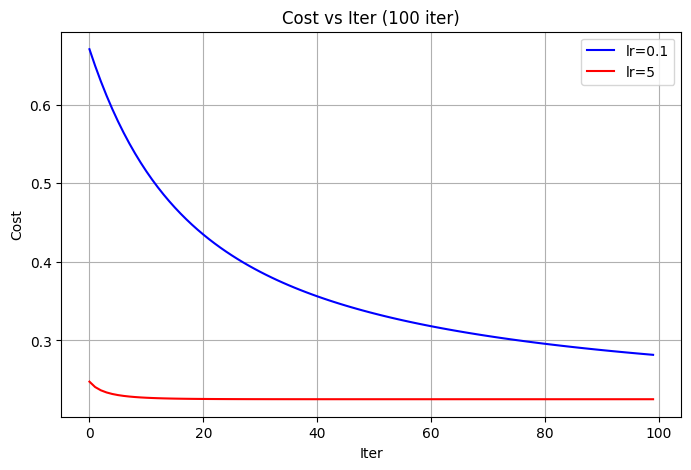

TP: 43 FP: 5
FN: 7 TN: 44
Acc: 87.88%
Prec: 89.58%
Recall: 86.00%
F1: 87.76%


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv("logisticX.csv").values
y = pd.read_csv("logisticY.csv").values
if len(y.shape) == 1:
    y = y.reshape(-1, 1)

mu = np.mean(X, axis=0)
sig = np.std(X, axis=0)
Xn = (X - mu) / sig

m = Xn.shape[0]
Xb = np.hstack((np.ones((m, 1)), Xn))

def s(z):
    return 1 / (1 + np.exp(-z))

def cost(t, Xb, y):
    m = y.shape[0]
    h = s(np.dot(Xb, t))
    eps = 1e-5
    return -(1/m) * np.sum(y * np.log(h + eps) + (1 - y) * np.log(1 - h + eps))

def gd(Xb, y, t, lr, n_iter=10000, tol=1e-7, rec=False):
    m = y.shape[0]
    J = []
    for i in range(n_iter):
        h = s(np.dot(Xb, t))
        grad = (1/m) * np.dot(Xb.T, (h - y))
        t = t - lr * grad
        c = cost(t, Xb, y)
        if rec:
            J.append(c)
        if i > 0 and abs(J[-1] - J[-2]) < tol:
            print(f"Convergence at {i}")
            break
    return t, J

lr = 0.1
t0 = np.zeros((Xb.shape[1], 1))
t, J = gd(Xb, y, t0, lr, n_iter=10000, tol=1e-7, rec=True)
print("Cost:", J[-1])
print("Theta:", t.flatten())

plt.figure(figsize=(8,5))
plt.plot(J, 'b-')
plt.xlabel("Iter")
plt.ylabel("Cost")
plt.title("Cost vs Iter (lr=0.1)")
plt.grid(True)
plt.show()

if Xn.shape[1] < 2:
    raise ValueError("Need >=2 feats")

t0_, t1, t2 = t.flatten()[:3]
x1 = np.linspace(np.min(Xn[:,0]) - 0.5, np.max(Xn[:,0]) + 0.5, 100)
x2 = -(t0_ + t1 * x1) / t2

plt.figure(figsize=(8,6))
plt.plot(Xn[y.flatten()==0, 0], Xn[y.flatten()==0, 1], 'bo', label="0")
plt.plot(Xn[y.flatten()==1, 0], Xn[y.flatten()==1, 1], 'rs', label="1")
plt.plot(x1, x2, 'k-', linewidth=2, label="Bound")
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Data & Bound")
plt.legend()
plt.grid(True)
plt.show()

n_iter = 100
t1_init = np.zeros((Xb.shape[1], 1))
t1, J1 = gd(Xb, y, t1_init, lr=0.1, n_iter=n_iter, tol=1e-12, rec=True)
t2_init = np.zeros((Xb.shape[1], 1))
t2, J2 = gd(Xb, y, t2_init, lr=5, n_iter=n_iter, tol=1e-12, rec=True)

plt.figure(figsize=(8,5))
plt.plot(J1, 'b-', label="lr=0.1")
plt.plot(J2, 'r-', label="lr=5")
plt.xlabel("Iter")
plt.ylabel("Cost")
plt.title("Cost vs Iter (100 iter)")
plt.legend()
plt.grid(True)
plt.show()

def pred(t, Xb):
    return (s(np.dot(Xb, t)) >= 0.5).astype(int)

yp = pred(t, Xb)
TP = np.sum((yp == 1) & (y == 1))
TN = np.sum((yp == 0) & (y == 0))
FP = np.sum((yp == 1) & (y == 0))
FN = np.sum((yp == 0) & (y == 1))

print("TP:", TP, "FP:", FP)
print("FN:", FN, "TN:", TN)

acc = (TP + TN) / m
prec = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * prec * recall / (prec + recall) if (prec + recall) > 0 else 0

print("Acc: {:.2f}%".format(acc*100))
print("Prec: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1: {:.2f}%".format(f1*100))
